In [1]:
# In Week 4, you will:

# Learn how to classify whisky
# Learn how to use GPS data to track the migration patterns of birds
# Learn how to analyze social networks

In [ ]:
4.1.1: Getting Started with Pandas
# This case study will deepen your understanding of Pandas, NumPy,
# and scikit-learn, and perhaps of scotch whisky.

# Pandas has two data structures that you need to know the basics of,
# and these are called Series and Data Frame.
# In short, Series is a one-dimensional array-like object,
# and Data Frame is a two-dimensional array-like object.

In [15]:
import pandas as pd
pd.Series([6,3,8,6])
x = pd.Series([6,3,8,6], index=['q','w','e','r'])
x[['r','w']]

r    6
w    3
dtype: int64

In [14]:
age = {'Tim':29,'Jim':31,'Pam':27,'Sam':35}
x = pd.Series(age)
x['Jim']
x.shape

(4,)

In [21]:
data = {'name':['Tim','Jim','Pam','Sam'], 'age':[29,31,27,35], 'ZIP':['02115','02130','67700','00100']}
x = pd.DataFrame(data, columns=['name','age','ZIP'])

In [25]:
x.index

RangeIndex(start=0, stop=4, step=1)

In [27]:
x = pd.Series([6,3,8,6], index=['q','w','e','r'])
sorted(x.index)

['e', 'q', 'r', 'w']

In [28]:
x.reindex(sorted(x.index))

e    8
q    6
r    6
w    3
dtype: int64

In [29]:
x

q    6
w    3
e    8
r    6
dtype: int64

In [32]:
# Series and Data Frame objects support arithmetic operations like addition.
# introduces a NAN, or not a number object, the resulting series.
x = pd.Series([6,3,8,6], index=['q','w','e','r'])
y = pd.Series([7,3,5,2], index=['e','q','r','t'])
x , y
x + y

e    15.0
q     9.0
r    11.0
t     NaN
w     NaN
dtype: float64

In [37]:
# 4.1.2: Loading and Inspecting Data
import numpy as np
import pandas as pd

whisky = pd.read_csv("whiskies.txt")
whisky['Region'] = pd.read_csv('regions.txt') # add Region clomn in whisky

In [48]:
whisky.head()
whisky.tail()
whisky.shape
whisky.info
whisky.columns

Index(['RowID', 'Distillery', 'Body', 'Sweetness', 'Smoky', 'Medicinal',
       'Tobacco', 'Honey', 'Spicy', 'Winey', 'Nutty', 'Malty', 'Fruity',
       'Floral', 'Postcode', ' Latitude', ' Longitude', 'Region'],
      dtype='object')

In [53]:
# We can use the iloc method to index a data frame by location.
whisky.iloc[0:10]

whisky.iloc[5:10, 0:5] # row 5->10 and column 0->5

flavors =whisky.iloc[:,2:14] # all rows and  flavor columns
flavors

,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral
0,2,2,2,0,0,2,1,2,2,2,2,2
1,3,3,1,0,0,4,3,2,2,3,3,2
2,1,3,2,0,0,2,0,0,2,2,3,2
3,4,1,4,4,0,0,2,0,1,2,1,0
4,2,2,2,0,0,1,1,1,2,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
81,1,1,1,0,0,1,0,0,1,2,2,2
82,2,3,2,0,0,2,2,1,1,2,0,1
83,0,3,1,0,0,2,2,1,1,2,1,2
84,2,2,1,0,0,1,0,1,2,1,0,0


In [58]:
# 4.1.3: Exploring Correlations
# and by default, the function uses what is called Pearson correlation which estimates
# linear correlations in the data.

corr_flavors = pd.DataFrame.corr(flavors) # Compute pairwise correlation of columns, excluding NA/null values.
corr_flavors

,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral
Body,1.000000,-0.136518,0.524032,0.354050,0.168718,0.082031,0.188500,0.408576,0.126323,-0.116859,-0.013205,-0.461203
Sweetness,-0.136518,1.000000,-0.405897,-0.392017,-0.147871,0.132558,-0.054200,0.115727,-0.032493,-0.001516,0.019820,0.144987
Smoky,0.524032,-0.405897,1.000000,0.686071,0.365501,-0.195318,0.231745,-0.028190,-0.023132,-0.192875,-0.312970,-0.431663
Medicinal,0.354050,-0.392017,0.686071,1.000000,0.425106,-0.396629,0.044903,-0.202651,-0.113671,-0.258959,-0.330975,-0.511323
Tobacco,0.168718,-0.147871,0.365501,0.425106,1.000000,-0.275490,0.054068,0.009097,-0.117717,-0.059347,-0.235145,-0.212375
Honey,0.082031,0.132558,-0.195318,-0.396629,-0.275490,1.000000,0.139563,0.362021,0.188492,0.310184,0.108822,0.183029
Spicy,0.188500,-0.054200,0.231745,0.044903,0.054068,0.139563,1.000000,0.092704,-0.042856,0.036303,0.144714,0.034663
Winey,0.408576,0.115727,-0.028190,-0.202651,0.009097,0.362021,0.092704,1.000000,0.198467,0.112368,0.090694,-0.126932
Nutty,0.126323,-0.032493,-0.023132,-0.113671,-0.117717,0.188492,-0.042856,0.198467,1.000000,0.066157,0.071765,0.018302
Malty,-0.116859,-0.001516,-0.192875,-0.258959,-0.059347,0.310184,0.036303,0.112368,0.066157,1.000000,0.207288,0.106309


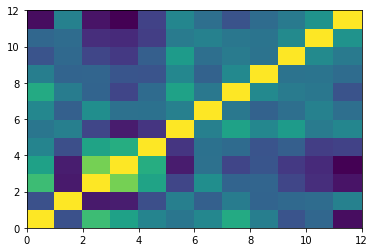

In [65]:
import matplotlib.pyplot as plt
# plt.figure(figsize=(10,10))
plt.pcolor(corr_flavors)
# plt.colorbar()
# plt.savefig('corr_whisky.pdf')

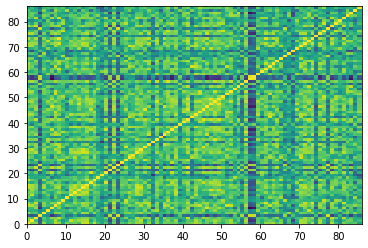

In [66]:
import matplotlib.pyplot as plt
corr_whisky = pd.DataFrame.corr(flavors.transpose())
# plt.figure(figsize=(10,10))
plt.pcolor(corr_whisky)
# plt.colorbar()
# plt.savefig('corr_flavors.pdf')

In [62]:
corr_whisky 

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,85
0,1.000000,0.708632,0.697354,-0.147311,0.731902,0.389086,0.464312,0.823842,0.713395,0.310460,...,0.463332,-0.021124,0.801060,0.463332,0.163033,0.662651,0.543305,0.504753,0.572186,0.267222
1,0.708632,1.000000,0.503074,-0.228591,0.511834,0.400983,0.460830,0.793052,0.510144,0.242821,...,0.455573,0.132175,0.658758,0.269202,0.132014,0.467396,0.607054,0.631655,0.372342,0.483030
2,0.697354,0.503074,1.000000,-0.140435,0.557020,0.389627,0.730465,0.647298,0.846651,0.502091,...,0.631008,0.014384,0.857180,0.631008,0.280806,0.828621,0.343536,0.545891,0.358457,0.303273
3,-0.147311,-0.228591,-0.140435,1.000000,0.231617,0.123130,-0.430674,-0.216957,-0.009969,0.436534,...,0.032372,0.898820,-0.347003,-0.016186,0.417436,-0.100172,0.151838,-0.392074,0.145517,-0.101649
4,0.731902,0.511834,0.557020,0.231617,1.000000,0.286251,0.286065,0.679366,0.691939,0.485363,...,0.413919,0.301941,0.531610,0.413919,0.068539,0.559690,0.693375,0.424397,0.695182,0.424397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,0.662651,0.467396,0.828621,-0.100172,0.559690,0.297537,0.784527,0.443607,0.876457,0.271653,...,0.529523,-0.021124,0.846835,0.529523,0.239754,1.000000,0.155230,0.385987,0.114437,0.267222
82,0.543305,0.607054,0.343536,0.151838,0.693375,0.589768,0.025786,0.612372,0.328266,0.437500,...,0.293151,0.340207,0.368605,0.373101,0.247121,0.155230,1.000000,0.669456,0.626628,0.382546
83,0.504753,0.631655,0.545891,-0.392074,0.424397,0.507630,0.591849,0.572637,0.351615,0.286910,...,0.407795,-0.156174,0.620437,0.570914,0.165436,0.385987,0.669456,1.000000,0.169210,0.414634
84,0.572186,0.372342,0.358457,0.145517,0.695182,0.304348,-0.060830,0.722315,0.503362,0.405465,...,0.251478,0.200643,0.304348,0.157174,-0.091090,0.114437,0.626628,0.169210,1.000000,0.282017


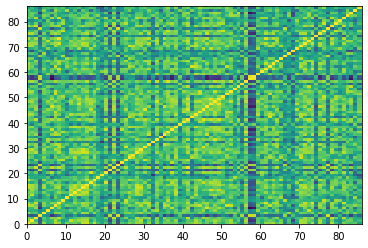

In [67]:
import matplotlib.pyplot as plt
corr_whisky = pd.DataFrame.corr(flavors.transpose())
# plt.figure(figsize=(10,10))
plt.pcolor(corr_whisky)
# plt.axis('tight')
# plt.colorbar()
# plt.savefig('corr_flavors.pdf')

In [ ]:
# 4.1.4: Clustering Whiskies By Flavor Profile
# Learn how to use spectral co-clustering to cluster whiskies based on their flavor profiles
